In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks, argrelextrema

In [24]:
def load_data_to_dataframe(filename):
    try:
        data = pd.read_csv(filename, skiprows=2, header=None, sep='\s+')
        data.columns = ['Lambda', 'Signal']
        return data
    except Exception as e:
        print(f"Error: {e}")
        return None

In [25]:
def find_extrema_to_visulize(df, peak_type='max'):
    if peak_type == 'max':
        peaks, _ = find_peaks(df['Signal'])
    else:
        peaks, _ = find_peaks(-df['Signal'])

    return peaks  # Return the actual indices of the peaks

In [26]:
def find_extrema(df, peak_type='max'):
    if peak_type == 'max':
        peaks, _ = find_peaks(df['Signal'])
    else:
        peaks, _ = find_peaks(-df['Signal'])

    extrema_wavelengths = df.iloc[peaks]['Lambda'].values
    return extrema_wavelengths

In [27]:
def calculate_thickness(N, lambda_max, lambda_min, n):
    return N / 2 * ((lambda_min / n * lambda_max / n) / (lambda_max / n - lambda_min / n))

In [28]:
def plot_extrema(df, maxima, minima, ax):
    ax.plot(df['Lambda'], df['Signal'], label='Signal')
    ax.scatter(df['Lambda'].iloc[maxima], df['Signal'].iloc[maxima], color='r', label='Maxima')
    ax.scatter(df['Lambda'].iloc[minima], df['Signal'].iloc[minima], color='g', label='Minima')
    ax.set_title('Signal with Extrema')
    ax.set_xlabel('Lambda')
    ax.set_ylabel('Signal')
    ax.legend()

In [29]:
df1 = load_data_to_dataframe("sample1.TRM")
df2 = load_data_to_dataframe("sample2.TRM")

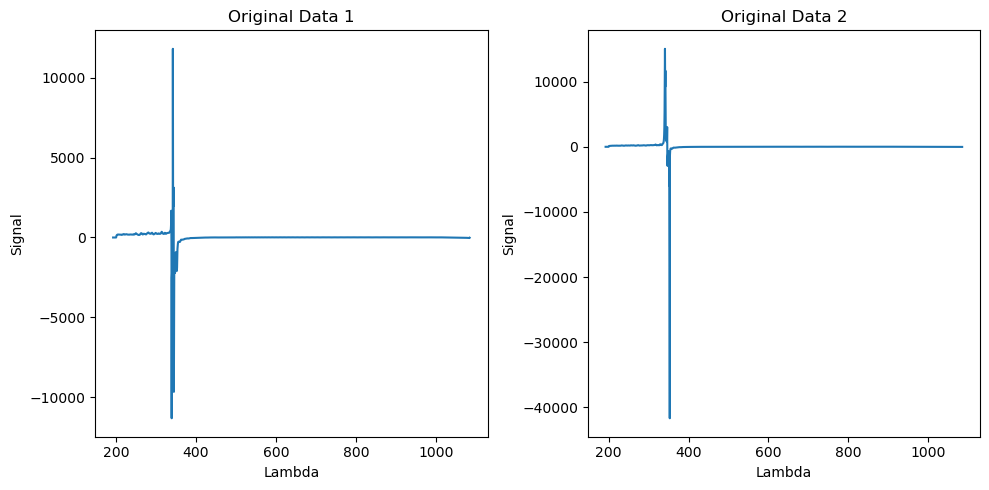

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(df1['Lambda'], df1['Signal'])
axs[0].set_title('Original Data 1')
axs[0].set_xlabel('Lambda')
axs[0].set_ylabel('Signal')

axs[1].plot(df2['Lambda'], df2['Signal'])
axs[1].set_title('Original Data 2')
axs[1].set_xlabel('Lambda')
axs[1].set_ylabel('Signal')

plt.tight_layout()
plt.show()

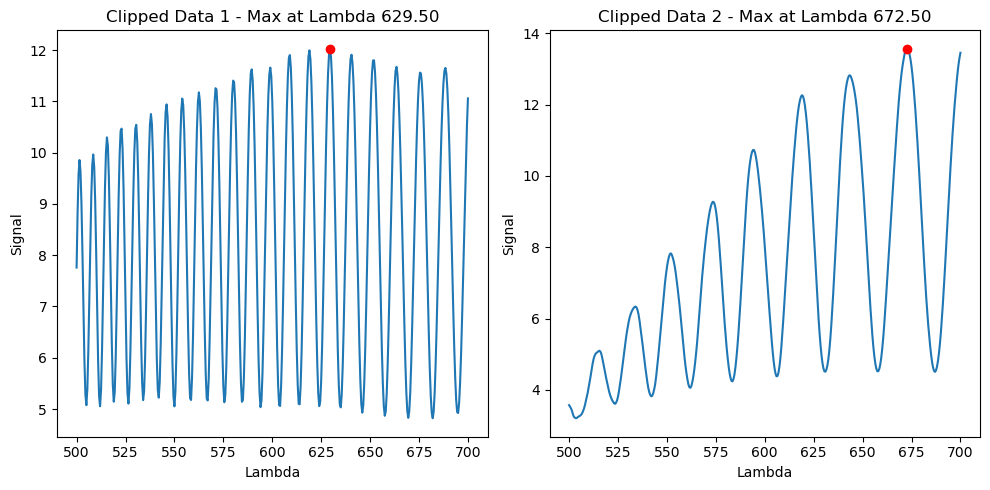

In [31]:
# Filtering the data and resetting the index
df1 = df1[(df1['Lambda'] >= 500) & (df1['Lambda'] <= 700)].reset_index(drop=True)
df2 = df2[(df2['Lambda'] >= 500) & (df2['Lambda'] <= 700)].reset_index(drop=True)

idx_max1 = df1['Signal'].idxmax()
idx_max2 = df2['Signal'].idxmax()

lambda_max1 = df1.loc[idx_max1, 'Lambda']
lambda_max2 = df2.loc[idx_max2, 'Lambda']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(df1['Lambda'], df1['Signal'])
axs[0].plot(lambda_max1, df1.loc[idx_max1, 'Signal'], 'ro')  # mark the maximum point
axs[0].set_title('Clipped Data 1 - Max at Lambda {:.2f}'.format(lambda_max1))
axs[0].set_xlabel('Lambda')
axs[0].set_ylabel('Signal')

axs[1].plot(df2['Lambda'], df2['Signal'])
axs[1].plot(lambda_max2, df2.loc[idx_max2, 'Signal'], 'ro')  # mark the maximum point
axs[1].set_title('Clipped Data 2 - Max at Lambda {:.2f}'.format(lambda_max2))
axs[1].set_xlabel('Lambda')
axs[1].set_ylabel('Signal')

plt.tight_layout()
plt.show()

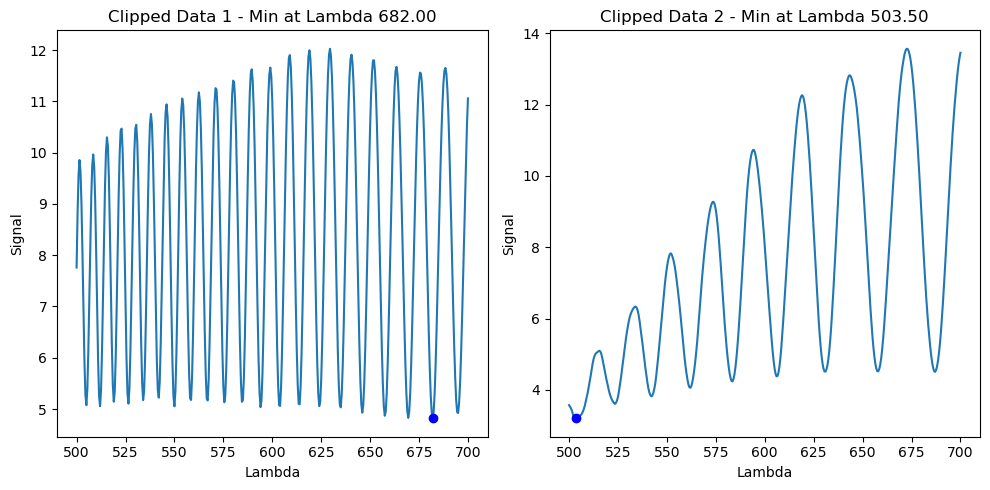

In [32]:
idx_min1 = df1['Signal'].idxmin()
idx_min2 = df2['Signal'].idxmin()

lambda_min1 = df1.loc[idx_min1, 'Lambda']
lambda_min2 = df2.loc[idx_min2, 'Lambda']

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(df1['Lambda'], df1['Signal'])
axs[0].plot(lambda_min1, df1.loc[idx_min1, 'Signal'], 'bo')  # mark the minimum point
axs[0].set_title('Clipped Data 1 - Min at Lambda {:.2f}'.format(lambda_min1))
axs[0].set_xlabel('Lambda')
axs[0].set_ylabel('Signal')

axs[1].plot(df2['Lambda'], df2['Signal'])
axs[1].plot(lambda_min2, df2.loc[idx_min2, 'Signal'], 'bo')  # mark the minimum point
axs[1].set_title('Clipped Data 2 - Min at Lambda {:.2f}'.format(lambda_min2))
axs[1].set_xlabel('Lambda')
axs[1].set_ylabel('Signal')

plt.tight_layout()
plt.show()

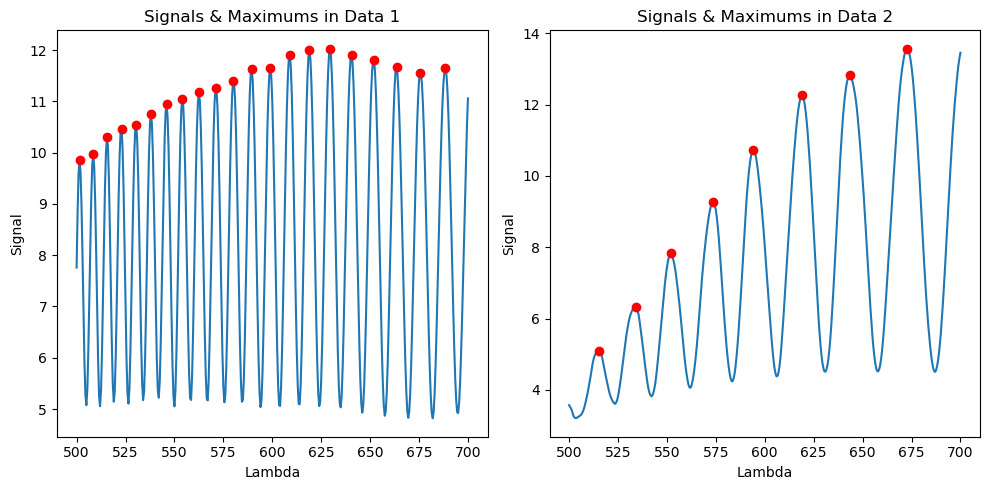

In [33]:
idx_maxima1 = argrelextrema(df1['Signal'].values, np.greater)[0]
idx_maxima2 = argrelextrema(df2['Signal'].values, np.greater)[0]

lambda_maxima1 = df1.iloc[idx_maxima1]['Lambda'].values
lambda_maxima2 = df2.iloc[idx_maxima2]['Lambda'].values

signal_maxima1 = df1.iloc[idx_maxima1]['Signal'].values
signal_maxima2 = df2.iloc[idx_maxima2]['Signal'].values

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(df1['Lambda'], df1['Signal'])
axs[0].plot(lambda_maxima1, signal_maxima1, 'ro')
axs[0].set_title('Signals & Maximums in Data 1')
axs[0].set_xlabel('Lambda')
axs[0].set_ylabel('Signal')

axs[1].plot(df2['Lambda'], df2['Signal'])
axs[1].plot(lambda_maxima2, signal_maxima2, 'ro')
axs[1].set_title('Signals & Maximums in Data 2')
axs[1].set_xlabel('Lambda')
axs[1].set_ylabel('Signal')

plt.tight_layout()
plt.show()

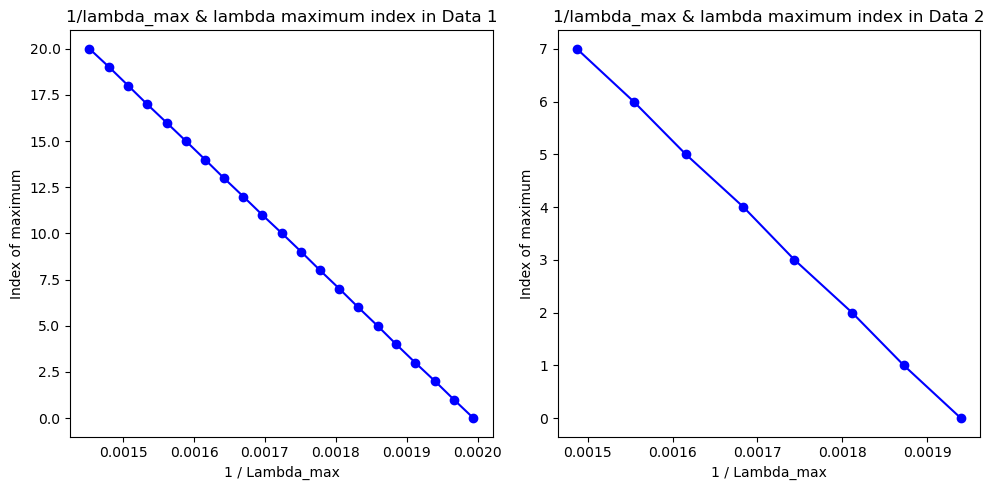

In [34]:
inverse_lambda_maxima1 = 1 / lambda_maxima1
inverse_lambda_maxima2 = 1 / lambda_maxima2

indices1 = np.arange(len(lambda_maxima1))
indices2 = np.arange(len(lambda_maxima2))

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(inverse_lambda_maxima1, indices1, 'bo-')
axs[0].set_title('1/lambda_max & lambda maximum index in Data 1')
axs[0].set_ylabel('Index of maximum')
axs[0].set_xlabel('1 / Lambda_max')

axs[1].plot( inverse_lambda_maxima2, indices2, 'bo-')
axs[1].set_title('1/lambda_max & lambda maximum index in Data 2')
axs[1].set_ylabel('Index of maximum')
axs[1].set_xlabel('1 / Lambda_max')

plt.tight_layout()
plt.show()

In [35]:
# Finding the maxima and minima after filtering
maxima1 = find_extrema_to_visulize(df1, 'max')
minima1 = find_extrema_to_visulize(df1, 'min')

maxima2 = find_extrema_to_visulize(df2, 'max')
minima2 = find_extrema_to_visulize(df2, 'min')

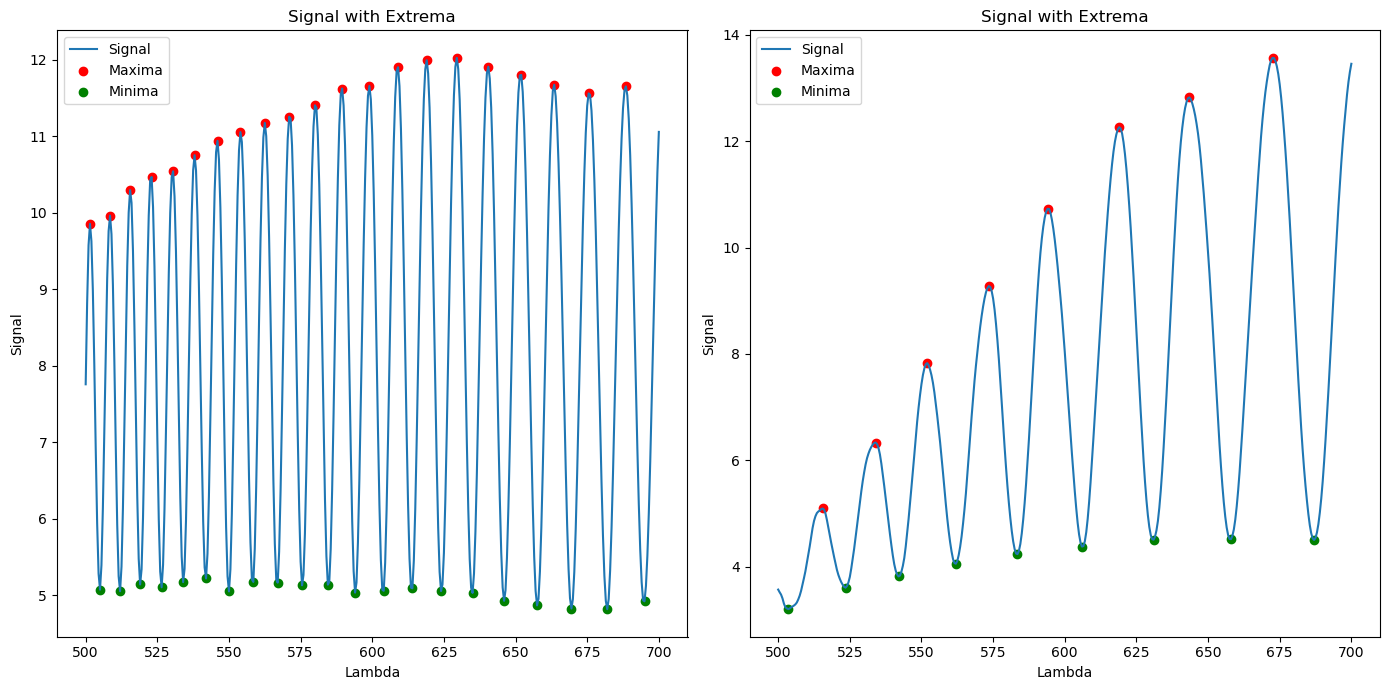

In [36]:
# Plotting the data with identified maxima and minima
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

plot_extrema(df1, maxima1, minima1, axs[0])
plot_extrema(df2, maxima2, minima2, axs[1])

plt.tight_layout()
plt.savefig('signal_with_points.jpg')
plt.show()

In [37]:
# Finding the maxima and minima after filtering
maxima1 = find_extrema(df1, 'max')
minima1 = find_extrema(df1, 'min')

maxima2 = find_extrema(df2, 'max')
minima2 = find_extrema(df2, 'min')

In [38]:
n = 1  # refractive index for air

thickness1 = calculate_thickness(len(maxima1), max(maxima1), min(minima1), n)
thickness2 = calculate_thickness(len(maxima2), max(maxima2), min(minima2), n)

print(f"Thickness of sample 1: {thickness1 / 1000:.3f} in micrometers") # divided by 1000 to get micrometers
print(f"Thickness of sample 2: {thickness2 / 1000:.3f} in micrometers") # divided by 1000 to get micrometers

Thickness of sample 1: 19.895 in micrometers
Thickness of sample 2: 8.014 in micrometers
